# Thermography

## Libraries

In [546]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

## Data selection

In [547]:
class Data:
	def __init__(self, root):
		self.table = self.__generate_table(root)
		self.training, self.validation, self.test = None, None, None

	def __generate_table(self, root):
		files = []

		for category in os.listdir(root):
			for filename in os.listdir(root + category):
				files.append([root + category + "/" + filename, category])

		return pd.DataFrame(files, columns=["filename", "category"])

In [548]:
data = Data("./data/thermography/")

In [549]:
data.table.head(1)

,filename,category
0,./data/thermography/healthy/16-TFRON_V16_31-10...,healthy


## Preprocessing and transformation

In [550]:
data.table.category = data.table.category.factorize()[0].astype(str)

In [551]:
data.table.head(1)

,filename,category
0,./data/thermography/healthy/16-TFRON_V16_31-10...,0


In [552]:
data.training, data.test = train_test_split(data.table, test_size=0.15, shuffle=True)

In [553]:
print(f"Raw: {data.table.category.value_counts().values}")
print(f"Training: {data.training.category.value_counts().values}")
print(f"Test: {data.test.category.value_counts().values}")

Raw: [99 96]
Training: [86 79]
Test: [17 13]


In [554]:
train_datagen = ImageDataGenerator(
	rescale=1./255,
	validation_split=0.2
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [555]:
train_generator = train_datagen.flow_from_dataframe(
	dataframe=data.training,
    x_col="filename",
    y_col="category",
    target_size=(538, 215),
    batch_size=25,
    class_mode="categorical",
    shuffle=True,
    color_mode="rgb",
    subset="training"
)

validation_generator = train_datagen.flow_from_dataframe(
	dataframe=data.training,
    x_col="filename",
    y_col="category",
    target_size=(538, 215),
    batch_size=25,
    class_mode="categorical",
    shuffle=True,
    color_mode="rgb",
    subset="validation"
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=data.test,
    x_col="filename",
    y_col="category",
    target_size=(538, 215),
    batch_size=1,
    class_mode="categorical",
    shuffle=False,
    color_mode="rgb",
)

Found 132 validated image filenames belonging to 2 classes.
Found 33 validated image filenames belonging to 2 classes.
Found 30 validated image filenames belonging to 2 classes.


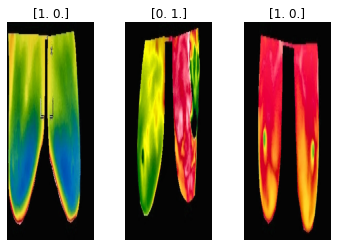

In [556]:
fig, ax = plt.subplots(nrows=1, ncols=3)

image, label = train_generator.next()

for i in range(3):    
    ax[i].imshow(image[i])
    ax[i].title.set_text(str(label[i]))
    ax[i].axis("off")
    
plt.show()